In [2]:
from vampires_calibration.on_sky import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path


/home/thomasmc/miniconda3/envs/charisenv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# hd25532

cubedir = Path('/home/thomasmc/charis_mm_testing/HD25532/cubes/data/raw')
rawdir = '/home/thomasmc/charis_mm_testing/HD25532/raw'
centroid_guesses = ([69,81],[134,117]) # Star is unpol, so should be roughly the same on both sides
annuli_radii = ([20,25],[20,25])
aper_radii = (20,20)
hwporder = [0,45,22.5,67.5]
boxsize = 45

for bin in range(22):
    fname = f'../datacsvs/onsky_csvs/HD25532/bin{bin}.csv'
    write_fits_info_to_csv_psf(cubedir,rawdir,fname,centroid_guesses=centroid_guesses,
                               box_size=boxsize, bkgd_annuli_radii=None,
                               wavelength_bin=bin, auto_annuli=True,
                               plot_every_x=25)


In [6]:
# concatenate hd25532 and hd35532 into one csv

hd3csvs = Path('../datacsvs/onsky_csvs/unpol_standards_1_star')
hd2csvs = Path('../datacsvs/onsky_csvs/unpol_standards/HD25532')
outcsvs = Path('../datacsvs/onsky_csvs/unpol_standards/HD35532_and_HD25532')
for file1 in hd3csvs.glob('*.csv'):
    bin_num = file1.stem
    # match bin number
    file2 = hd2csvs / f"{bin_num}.csv"
    if file2.exists():
        df1 = pd.read_csv(file1)
        df2 = pd.read_csv(file2)
        df = pd.concat([df1,df2])
        outpath = outcsvs / f"{bin_num}.csv"
        df.to_csv(outpath,index=False)
        print(f"Written {outpath}")


Written ../datacsvs/onsky_csvs/unpol_standards/HD35532_and_HD25532/bin13.csv
Written ../datacsvs/onsky_csvs/unpol_standards/HD35532_and_HD25532/bin10.csv
Written ../datacsvs/onsky_csvs/unpol_standards/HD35532_and_HD25532/bin0.csv
Written ../datacsvs/onsky_csvs/unpol_standards/HD35532_and_HD25532/bin15.csv
Written ../datacsvs/onsky_csvs/unpol_standards/HD35532_and_HD25532/bin17.csv
Written ../datacsvs/onsky_csvs/unpol_standards/HD35532_and_HD25532/bin19.csv
Written ../datacsvs/onsky_csvs/unpol_standards/HD35532_and_HD25532/bin8.csv
Written ../datacsvs/onsky_csvs/unpol_standards/HD35532_and_HD25532/bin11.csv
Written ../datacsvs/onsky_csvs/unpol_standards/HD35532_and_HD25532/bin2.csv
Written ../datacsvs/onsky_csvs/unpol_standards/HD35532_and_HD25532/bin1.csv
Written ../datacsvs/onsky_csvs/unpol_standards/HD35532_and_HD25532/bin18.csv
Written ../datacsvs/onsky_csvs/unpol_standards/HD35532_and_HD25532/bin6.csv
Written ../datacsvs/onsky_csvs/unpol_standards/HD35532_and_HD25532/bin16.csv
Writ

In [ ]:
# tag good frames from tag 154117 to 00154145
import os
good_tags = [f"{i:08d}" for i in range(154117,154146)]

# # #     all_tags.append(tag)
# for frame in sorted(glob.glob('/home/thomasmc/charis_mm_testing/HD25532/cubes/data/raw/*_cube.fits')):
#     match = re.search(r'(\d{8})', frame)
#     tag = match.group(1) if match else "unknown"
#     if tag in good_tags:
#         #rename to have good_ at start
#         newname = frame.replace('CRSA','good_CRSA')
#         os.rename(frame,newname)
#         print(f"Renamed {frame} to {newname}")



Renamed /home/thomasmc/charis_mm_testing/HD25532/cubes/data/raw/CRSA00154117_cube.fits to /home/thomasmc/charis_mm_testing/HD25532/cubes/data/raw/good_CRSA00154117_cube.fits
Renamed /home/thomasmc/charis_mm_testing/HD25532/cubes/data/raw/CRSA00154118_cube.fits to /home/thomasmc/charis_mm_testing/HD25532/cubes/data/raw/good_CRSA00154118_cube.fits
Renamed /home/thomasmc/charis_mm_testing/HD25532/cubes/data/raw/CRSA00154119_cube.fits to /home/thomasmc/charis_mm_testing/HD25532/cubes/data/raw/good_CRSA00154119_cube.fits
Renamed /home/thomasmc/charis_mm_testing/HD25532/cubes/data/raw/CRSA00154120_cube.fits to /home/thomasmc/charis_mm_testing/HD25532/cubes/data/raw/good_CRSA00154120_cube.fits
Renamed /home/thomasmc/charis_mm_testing/HD25532/cubes/data/raw/CRSA00154121_cube.fits to /home/thomasmc/charis_mm_testing/HD25532/cubes/data/raw/good_CRSA00154121_cube.fits
Renamed /home/thomasmc/charis_mm_testing/HD25532/cubes/data/raw/CRSA00154122_cube.fits to /home/thomasmc/charis_mm_testing/HD25532

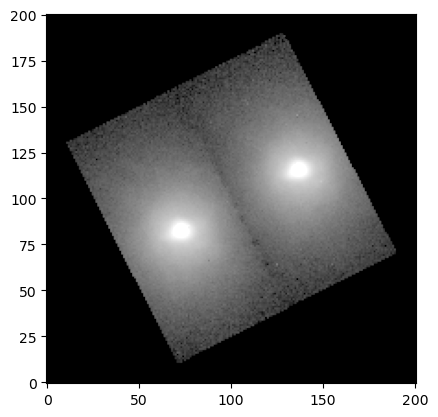

In [ ]:
goodframedir = Path('/home/thomasmc/charis_mm_testing/HD25532/cubes/data/raw/good_frames')
# test a fits file to get a good aperture size

testfits = glob.glob(str(goodframedir / 'good_CRSA00154*_cube.fits'))[0]
test_hdul = fits.open(testfits)
image_data = test_hdul[1].data


In [4]:
x = 160-131
y = 131-117
r = np.sqrt(x**2+y**2)
print(r/3)

10.734161458736411


In [ ]:
# redo HD35532 with auto fwhm
cubedir = Path('/home/thomasmc/charis_mm_testing/HD35532/cubes/data/raw')
rawdir = '/home/thomasmc/charis_mm_testing/HD35532/raw'
centroid_guesses = ([67,80],[132,114]) # Star is unpol

for bin in range(22):
    fname = f'../datacsvs/onsky_csvs/HD35532_autoapertures/bin{bin}.csv'

    write_fits_info_to_csv_psf(cubedir,rawdir,fname,centroid_guesses=centroid_guesses,
                               box_size=45,wavelength_bin=bin,auto_annuli=True,plot_every_x=25,max_fwhm=[10,11])



In [ ]:
# redo HD35532 with fixed fwhm
cubedir = Path('/home/thomasmc/charis_mm_testing/HD35532/cubes/data/raw')
rawdir = '/home/thomasmc/charis_mm_testing/HD35532/raw'
centroid_guesses = ([68,81],[132,114]) # guesses for PSF centroids
aper_radii = (18,18) # using <~3X FWHM for aperture radius due to space
bkgd_annuli_radii = ([18,26],[18,28]) # annuli for background subtraction
box_size = 51 # box for centroid finder to search

for bin in range(22):
    fname = f'../datacsvs/onsky_csvs/HD35532_fixedaps/bin{bin}.csv'

    write_fits_info_to_csv_psf(cubedir,rawdir,fname,centroid_guesses=centroid_guesses,
                               box_size=box_size,bkgd_annuli_radii=bkgd_annuli_radii,aperture_radii=aper_radii,wavelength_bin=bin,plot_every_x=25,max_fwhm=[10,11])


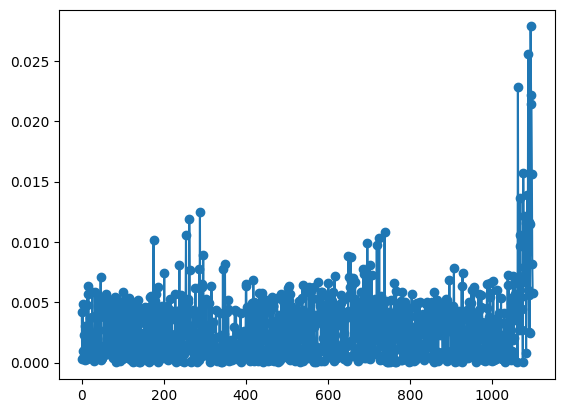

In [7]:
from vampires_calibration.csv_tools import read_csv_physical_model_all_bins
from vampires_calibration.utils import process_dataset, process_errors
csvdirnew = '../datacsvs/onsky_csvs/HD35532_autoapertures'
csvdirold = '../datacsvs/onsky_csvs/unpol_standards_1_star'

vals, stds, configs = read_csv_physical_model_all_bins(csvdirnew)
vals_old, stds_old, configs_old = read_csv_physical_model_all_bins(csvdirold)

dds_new = process_dataset(vals)[::2]
dds_old = process_dataset(vals_old)[::2]

diffs = np.abs(dds_new - dds_old)

plt.plot(range(len(diffs)),diffs,'o-' )

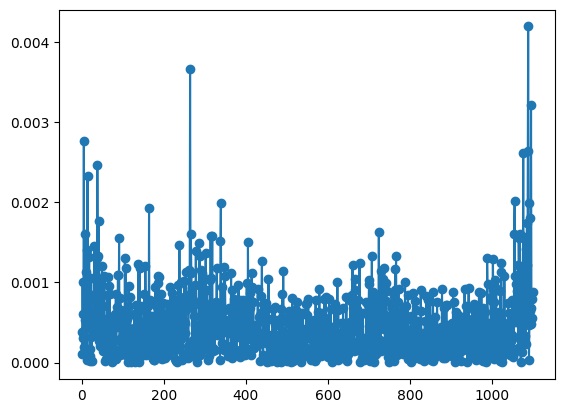

In [11]:
# fixed apertures 
from vampires_calibration.csv_tools import read_csv_physical_model_all_bins
from vampires_calibration.utils import process_dataset, process_errors
csvdirnew = '../datacsvs/onsky_csvs/HD35532_fixedaps'
csvdirold = '../datacsvs/onsky_csvs/unpol_standards_1_star'

vals, stds, configs = read_csv_physical_model_all_bins(csvdirnew)
vals_old, stds_old, configs_old = read_csv_physical_model_all_bins(csvdirold)

dds_new = process_dataset(vals)[::2]
dds_old = process_dataset(vals_old)[::2]

diffs = np.abs(dds_new - dds_old)

plt.plot(range(len(diffs)),diffs,'o-' )

In [ ]:
# rewrite pol csv

cubedir = '/home/thomasmc/charis_mm_testing/HD30675-pol/cubes/data/raw'
rawdir = '/home/thomasmc/charis_mm_testing/HD30675-pol/raw'

centroid_guesses = [(70,80), (134,113)]
annuli_radii = ([15.6,25.6],[15.6,25.6]) 
aper_radii = (15.6,15.6) # 3X fwhm
boxssize = 45 # box to search for psf

for bin in range(22):
    fname = f'../datacsvs/onsky_csvs/pol_standards/HD30675/bin{bin}.csv'
    write_fits_info_to_csv_psf(cubedir,rawdir,fname,centroid_guesses=centroid_guesses,
                               box_size=boxssize,wavelength_bin=bin,auto_annuli=True,
                               plot_every_x=25,max_fwhm=[9,10])

In [ ]:
# rewrite bd csv
cubedir = '/home/thomasmc/charis_mm_testing/BD343631-broadband-unpol/cubes/data/raw'
rawdir = '/home/thomasmc/charis_mm_testing/BD343631-broadband-unpol/raw'

centroid_guesses = ([65,83],[133,118]) # guesses for PSF centroids
annuli_radii = ([15,25],[15,25]) # annuli for background subtraction
aper_radii = (15,15) # using ~3X FWHM for aperture radius

for bin in range(22):
    fname = f'../datacsvs/onsky_csvs/BD343631/bin{bin}.csv'
    write_fits_info_to_csv_psf(cubedir,rawdir,fname,centroid_guesses=centroid_guesses,
                               box_size=45,auto_annuli=True,
                               wavelength_bin=bin,plot_every_x=25,max_fwhm=[10,11])


In [11]:
# concantenate bd and hd35532 into one csv
import glob
for csv in glob.glob('/home/thomasmc/vampires_calibration/vampires_calibration/CHARIS/datacsvs/onsky_csvs/unpol_standards_2_stars/*.csv'):
    bin_num = Path(csv).stem
    # match bin number
    bd_csv = Path(f'/home/thomasmc/vampires_calibration/vampires_calibration/CHARIS/datacsvs/onsky_csvs/BD343631/{bin_num}.csv')
    if Path(csv).exists() and bd_csv.exists():
        df1 = pd.read_csv(csv)
        df2 = pd.read_csv(bd_csv)
        df = pd.concat([df1,df2])
        outpath = csv
        df.to_csv(outpath,index=False)
        print(f"Written {outpath}")


Written /home/thomasmc/vampires_calibration/vampires_calibration/CHARIS/datacsvs/onsky_csvs/unpol_standards_2_stars/bin13.csv
Written /home/thomasmc/vampires_calibration/vampires_calibration/CHARIS/datacsvs/onsky_csvs/unpol_standards_2_stars/bin10.csv
Written /home/thomasmc/vampires_calibration/vampires_calibration/CHARIS/datacsvs/onsky_csvs/unpol_standards_2_stars/bin0.csv
Written /home/thomasmc/vampires_calibration/vampires_calibration/CHARIS/datacsvs/onsky_csvs/unpol_standards_2_stars/bin15.csv
Written /home/thomasmc/vampires_calibration/vampires_calibration/CHARIS/datacsvs/onsky_csvs/unpol_standards_2_stars/bin17.csv
Written /home/thomasmc/vampires_calibration/vampires_calibration/CHARIS/datacsvs/onsky_csvs/unpol_standards_2_stars/bin19.csv
Written /home/thomasmc/vampires_calibration/vampires_calibration/CHARIS/datacsvs/onsky_csvs/unpol_standards_2_stars/bin8.csv
Written /home/thomasmc/vampires_calibration/vampires_calibration/CHARIS/datacsvs/onsky_csvs/unpol_standards_2_stars/bin1